# Final Project: Wake County, N.C. Voter Data

In [1]:
import pandas as pd

### Import Data

In [4]:
# Dataframe 1 
data1 = pd.read_excel('vrdb01.xlsx')

# Dataframe 2
data2 = pd.read_excel('vrdb02_12.xlsx')

# Dataframe 3
data3 = pd.read_excel('vrdb13_20.xlsx')

### Preview Data

In [5]:
data1.head()

,county_name,ReportDate,voter_reg_num,status_lbl,last_name,first_name,middle_name,name_suffix_lbl,house_num,half_code,...,11/06/2018,10/08/2019,11/05/2019,03/03/2020,11/03/2020,10/05/2021,11/02/2021,05/17/2022,07/26/2022,11/08/2022
0,WAKE,2023-02-20,100928943,A,ABERCOMBIE,EWAN,MARTIN,NaN,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,WAKE,2023-02-20,100904483,A,ACKERMAN,RENEE,NICOLE,NaN,2212,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O
2,WAKE,2023-02-20,10165132,A,ADAMS,DOROTA,TULODZIECKA,NaN,308,NaN,...,M,V,NaN,V,M,NaN,NaN,NaN,NaN,M
3,WAKE,2023-02-20,27940,A,ADAMS,JEFFERSON,HODGES,NaN,308,NaN,...,O,V,NaN,V,M,NaN,NaN,NaN,NaN,M
4,WAKE,2023-02-20,100930039,A,ADAMS,KATHRYN,JANEL,NaN,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O


### Merge all 3 tables together

In [6]:
raw_df = pd.concat([data1,data2,data3])
raw_df.head()

,county_name,ReportDate,voter_reg_num,status_lbl,last_name,first_name,middle_name,name_suffix_lbl,house_num,half_code,...,11/06/2018,10/08/2019,11/05/2019,03/03/2020,11/03/2020,10/05/2021,11/02/2021,05/17/2022,07/26/2022,11/08/2022
0,WAKE,2023-02-20,100928943,A,ABERCOMBIE,EWAN,MARTIN,NaN,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,WAKE,2023-02-20,100904483,A,ACKERMAN,RENEE,NICOLE,NaN,2212,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O
2,WAKE,2023-02-20,10165132,A,ADAMS,DOROTA,TULODZIECKA,NaN,308,NaN,...,M,V,NaN,V,M,NaN,NaN,NaN,NaN,M
3,WAKE,2023-02-20,27940,A,ADAMS,JEFFERSON,HODGES,NaN,308,NaN,...,O,V,NaN,V,M,NaN,NaN,NaN,NaN,M
4,WAKE,2023-02-20,100930039,A,ADAMS,KATHRYN,JANEL,NaN,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O


In [7]:
raw_df.shape

(794524, 54)

### Filter out <u>Inactive</u> Voters

In [8]:
# Filter status lbl columns for 'A'(Active) voters
df1 = raw_df[raw_df['status_lbl'] == 'A'] .copy()

# Verify the filter
df1.status_lbl.value_counts()

A    712637
Name: status_lbl, dtype: int64

### Filter out voters registered after 11-03-2020

In [9]:
# Convert the registration_dt column into a Datetime Object
df1['registration_dt'] = pd.to_datetime(df1['registration_dt'])

# Verify that most recent reg. date is before 11/3/2020 
df1.loc[df1['registration_dt'] < '11-03-2020', 'registration_dt'].sort_values(ascending=False)

240113   2020-11-02
215552   2020-11-02
45193    2020-11-02
29024    2020-11-02
171484   2020-11-02
            ...    
42350    1952-01-01
219470   1952-01-01
18117    1952-01-01
31470    1952-01-01
192650   1952-01-01
Name: registration_dt, Length: 600119, dtype: datetime64[ns]

###  Covert Look up Values to Actual Values
* Columns: gender_lbl, race_lbl, party_lbl

In [10]:
# Inspect Look-up value counts
print(df1['gender_lbl'].value_counts())
print(df1['race_lbl'].value_counts())
print(df1['party_lbl'].value_counts())

F    346937
M    300036
U     65663
Name: gender_lbl, dtype: int64
W    448035
B    121975
U     75620
O     31782
A     28783
M      4634
I      1761
P        47
Name: race_lbl, dtype: int64
UNA    294142
DEM    253742
REP    159462
LIB      5192
GRE        99
Name: party_lbl, dtype: int64


In [11]:
# Functions to transform Look-up values to actual values

# gender_lbl Function
def gender_conv(gender):
    if gender == 'M':
        return 'Male'
    elif gender == 'F':
        return 'Female'
    else:
        return 'Other'

# race_lbl Function
def race_conv(race):
    if race == 'W':
        return 'White'
    elif race == 'B':
        return 'Black'
    else:
        return 'Other'

# party_lbl Function
def party_conv(party):
    if party == 'DEM':
        return 'Democrat'
    elif party == 'REP':
        return 'Republican'
    elif party == 'UNA':
        return 'Unaffiliated'
    else:
        return 'Other'

In [12]:
# Tansform the columns using the functions above
df1['gender_lbl'] = df1['gender_lbl'].apply(gender_conv).copy()
df1['race_lbl'] = df1['race_lbl'].apply(race_conv).copy()
df1['party_lbl'] = df1['party_lbl'].apply(party_conv).copy()

# Verify the functions work. Print the new value counts 
print(df1['gender_lbl'].value_counts())
print(df1['race_lbl'].value_counts())
print(df1['party_lbl'].value_counts())

Female    346937
Male      300036
Other      65664
Name: gender_lbl, dtype: int64
White    448035
Other    142627
Black    121975
Name: race_lbl, dtype: int64
Unaffiliated    294142
Democrat        253742
Republican      159462
Other             5291
Name: party_lbl, dtype: int64


### Remove all voting date columns except for '11/03/2020'

In [13]:
df1.columns

Index(['county_name', 'ReportDate', 'voter_reg_num', 'status_lbl', 'last_name',
       'first_name', 'middle_name', 'name_suffix_lbl', 'house_num',
       'half_code', 'street_dir_lbl', 'street_name', 'street_type_lbl',
       'street_suffix_lbl', 'unit_designator', 'unit_num_str', 'city', 'state',
       'zip', 'mail_addr1', 'mail_addr2', 'mail_addr3', 'mail_addr4',
       'mail_city', 'mail_state', 'mail_zip', 'race_lbl', 'party_lbl',
       'gender_lbl', 'registration_dt', 'eoy_age', 'precinct_lbl',
       'municipality_lbl', 'ward_lbl', 'congressional_district_lbl',
       'superior_court_lbl', 'judicial_district_lbl', 'nc_senate_lbl',
       'nc_house_lbl', 'county_commissioner_lbl', 'school_lbl',
       'prosecutorial_lbl', 'voting_district_lbl', '05/08/2018', '11/06/2018',
       '10/08/2019', '11/05/2019', '03/03/2020', '11/03/2020', '10/05/2021',
       '11/02/2021', '05/17/2022', '07/26/2022', '11/08/2022'],
      dtype='object')

In [14]:
# List of date columns to drop
drop_cols = ['05/08/2018', '11/06/2018', '10/08/2019', '11/05/2019', '03/03/2020', 
             '10/05/2021','11/02/2021', '05/17/2022', '07/26/2022', '11/08/2022']

# Drop list of date columns from dataframe
df1 = df1.drop(drop_cols, axis=1)

# Verify the columns have been removed
df1.columns

Index(['county_name', 'ReportDate', 'voter_reg_num', 'status_lbl', 'last_name',
       'first_name', 'middle_name', 'name_suffix_lbl', 'house_num',
       'half_code', 'street_dir_lbl', 'street_name', 'street_type_lbl',
       'street_suffix_lbl', 'unit_designator', 'unit_num_str', 'city', 'state',
       'zip', 'mail_addr1', 'mail_addr2', 'mail_addr3', 'mail_addr4',
       'mail_city', 'mail_state', 'mail_zip', 'race_lbl', 'party_lbl',
       'gender_lbl', 'registration_dt', 'eoy_age', 'precinct_lbl',
       'municipality_lbl', 'ward_lbl', 'congressional_district_lbl',
       'superior_court_lbl', 'judicial_district_lbl', 'nc_senate_lbl',
       'nc_house_lbl', 'county_commissioner_lbl', 'school_lbl',
       'prosecutorial_lbl', 'voting_district_lbl', '11/03/2020'],
      dtype='object')

### Covert Target Varible '11/03/2020' to Binary 
* 1 = Did Vote
* 0 = Did Not Vote (Missing Values)

In [15]:
# Inspect values of target variable
df1['11/03/2020'].value_counts()

O    326083
M    151698
V     72155
P      1424
Name: 11/03/2020, dtype: int64

In [16]:
# Count the missing values
df1['11/03/2020'].isnull().sum()

161277

In [17]:
# Fill missing values of target variable with 'Missing'
df1['11/03/2020'] = df1['11/03/2020'].fillna('Missing')


# Create a function that converts values to Did Vote(1) or Did Not Vote(0)
def vote_conv(vote):
    if vote == 'Missing':
        return 0
    else:
        return 1
    
# Apply the function to the Target Variable
df1['11/03/2020'] = df1['11/03/2020'].apply(vote_conv).copy()

# Verify that Negative Class values equals Missing value Count 
df1['11/03/2020'].value_counts()

1    551360
0    161277
Name: 11/03/2020, dtype: int64

### Find someone in the dataset that you "know"
* I choose the governor of NC: Roy Cooper

In [18]:
# Filter Records by NC governor's full name
df1.loc[(df1['last_name'] == 'COOPER') & (df1['first_name'] == 'ROY') & (df1['middle_name'] == 'ASBERRY')]

,county_name,ReportDate,voter_reg_num,status_lbl,last_name,first_name,middle_name,name_suffix_lbl,house_num,half_code,...,congressional_district_lbl,superior_court_lbl,judicial_district_lbl,nc_senate_lbl,nc_house_lbl,county_commissioner_lbl,school_lbl,prosecutorial_lbl,voting_district_lbl,11/03/2020
12418,WAKE,2023-02-20,31166223,A,COOPER,ROY,ASBERRY,III,1209,NaN,...,2,10A,10D,15,38,5,6,10,01-07,1


### Remove any variables with a low expected predictive value
* These are columns that have either one unique value, too many categorical values, or irrelevant/redundant information 
* Registration_dt will be dropped after the new column is made later

In [19]:
df1.nunique()

county_name                        1
ReportDate                         1
voter_reg_num                 712637
status_lbl                         1
last_name                     107082
first_name                     61174
middle_name                    75849
name_suffix_lbl                   11
house_num                      11270
half_code                          4
street_dir_lbl                     8
street_name                    19253
street_type_lbl                   41
street_suffix_lbl                  6
unit_designator                    0
unit_num_str                    4131
city                              19
state                              1
zip                               39
mail_addr1                    384459
mail_addr2                      2078
mail_addr3                       103
mail_addr4                        36
mail_city                       1623
mail_state                        58
mail_zip                        7958
race_lbl                           3
p

In [20]:
# List of columns that likely have low predictive power
low_pred = ['county_name', 'ReportDate', 'status_lbl', 'voter_reg_num', 'last_name', 'first_name', 
            'middle_name', 'house_num', 'street_name','street_dir_lbl', 'street_type_lbl', 'street_suffix_lbl',
            'unit_designator', 'unit_num_str', 'state', 'zip', 'mail_addr1', 'mail_addr2', 'mail_addr3', 
            'mail_addr4', 'mail_city', 'mail_state', 'mail_zip', 'prosecutorial_lbl', 'voting_district_lbl',
            'precinct_lbl', 'school_lbl', 'superior_court_lbl', 'judicial_district_lbl', 'nc_senate_lbl', 
            'nc_house_lbl', 'nc_house_lbl', 'county_commissioner_lbl']

# Drop columns in low_pred from dataframe
df1 = df1.drop(low_pred, axis=1).copy()


# Verify columns have been dropped
print(df1.columns)


print(df1.nunique())

Index(['name_suffix_lbl', 'half_code', 'city', 'race_lbl', 'party_lbl',
       'gender_lbl', 'registration_dt', 'eoy_age', 'municipality_lbl',
       'ward_lbl', 'congressional_district_lbl', '11/03/2020'],
      dtype='object')
name_suffix_lbl                  11
half_code                         4
city                             19
race_lbl                          3
party_lbl                         4
gender_lbl                        3
registration_dt               10545
eoy_age                          91
municipality_lbl                 15
ward_lbl                         16
congressional_district_lbl        2
11/03/2020                        2
dtype: int64


### Fill or impute any null values
* name_suffix_lbl and half_code are almost completly missing.
* ward_lbl has too many categories(16); making it hard to impute.
* These columns will be dropped leaving no missing values in the dataframe.

In [21]:
# Percentage of missing values
df1.isnull().sum() / len(df1)

name_suffix_lbl               0.953313
half_code                     0.999614
city                          0.000000
race_lbl                      0.000000
party_lbl                     0.000000
gender_lbl                    0.000000
registration_dt               0.000000
eoy_age                       0.000000
municipality_lbl              0.000000
ward_lbl                      0.440162
congressional_district_lbl    0.000000
11/03/2020                    0.000000
dtype: float64

In [22]:
# List of columns to drop
mis_cols = ['name_suffix_lbl', 'half_code', 'ward_lbl']

# Drop columns from datafame
df1 = df1.drop(mis_cols, axis=1).copy()

# Verify missing value count
df1.isnull().sum()

city                          0
race_lbl                      0
party_lbl                     0
gender_lbl                    0
registration_dt               0
eoy_age                       0
municipality_lbl              0
congressional_district_lbl    0
11/03/2020                    0
dtype: int64

### Create New Variable: years_registered

In [23]:
# Use current year to calculate years_registered
df1['years_registered'] = 2023 - df1['registration_dt'].dt.year

df1['years_registered']

0          1
1          1
2         32
3         49
4          1
          ..
337388     9
337389     3
337390     1
337391     7
337392     7
Name: years_registered, Length: 712637, dtype: int64

### Reduce categorical variables to have <= 5 values
* Columns: registration_dt, city, municipality_lbl

In [24]:
df1.nunique()

city                             19
race_lbl                          3
party_lbl                         4
gender_lbl                        3
registration_dt               10545
eoy_age                          91
municipality_lbl                 15
congressional_district_lbl        2
11/03/2020                        2
years_registered                 72
dtype: int64

#### registration_dt (Drop)

In [25]:
# Drop registration_dt
df1 = df1.drop('registration_dt', axis=1).copy()

#### city

In [26]:
# Function to convert City column into 5 categories
def city_conv(city):
    if (city == 'RALEIGH') or (city == 'CARY') or (city == 'APEX') or (city == 'WAKE FOREST'):
        return city
    else:
        return 'OTHER'

# Explore city column values
df1['city'].value_counts()

RALEIGH          341057
CARY             102470
APEX              56930
WAKE FOREST       50150
FUQUAY VARINA     34260
HOLLY SPRINGS     29393
GARNER            22820
KNIGHTDALE        19594
MORRISVILLE       15706
WENDELL           13048
ZEBULON           10218
WILLOW SPRING      6653
ROLESVILLE         5911
NEW HILL           2337
CLAYTON             601
ANGIER              580
YOUNGSVILLE         413
CREEDMOOR           302
DURHAM              194
Name: city, dtype: int64

In [27]:
# Convert city column with function
df1['city'] = df1['city'].apply(city_conv)

df1['city'].value_counts()

RALEIGH        341057
OTHER          162030
CARY           102470
APEX            56930
WAKE FOREST     50150
Name: city, dtype: int64

#### municipality_lbl

In [28]:
# Function to limit categories
def mun_conv(mun):
    if (mun == 'RAL') or (mun == 'UNC') or (mun == 'CAR'):
        return mun
    else:
        return 'OTHER'

# Explore column values
df1['municipality_lbl'].value_counts()

RAL    276613
UNC    135356
CAR    107256
APE     41776
WF      31518
HOL     27754
FV      25783
GAR     20893
MOR     14395
KNI     12081
WEN      7252
ROL      6712
ZEB      4551
ANG       526
DUR       171
Name: municipality_lbl, dtype: int64

In [29]:
# Apply the function
df1['municipality_lbl'] = df1['municipality_lbl'].apply(mun_conv)

# Verify the new values
df1['municipality_lbl'].value_counts()

RAL      276613
OTHER    193412
UNC      135356
CAR      107256
Name: municipality_lbl, dtype: int64

### For numeric variables: explore the descriptive stats, histograms, and scatterplots/correlation

#### eoy_age

In [30]:
# EOY_Age statistics
print(df1['eoy_age'].describe())

count    712637.000000
mean         47.997737
std          17.992630
min          18.000000
25%          33.000000
50%          47.000000
75%          62.000000
max         108.000000
Name: eoy_age, dtype: float64


Text(0, 0.5, 'Count')

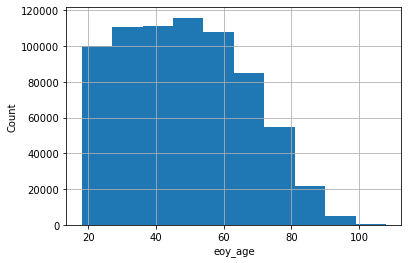

In [31]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6,4))

# eoy_age histogram
df1['eoy_age'].hist()
ax.set_xlabel('eoy_age')
ax.set_ylabel('Count')

In [32]:
# Years registered statistics
print(df1['years_registered'].describe())

count    712637.000000
mean         13.221496
std          12.342712
min           0.000000
25%           3.000000
50%           9.000000
75%          19.000000
max          71.000000
Name: years_registered, dtype: float64


Text(0, 0.5, 'Count')

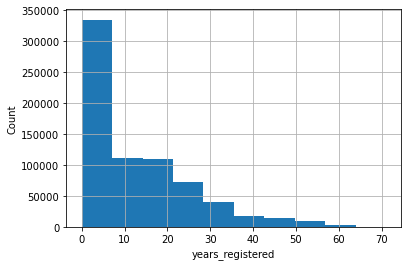

In [33]:
fig, ax = plt.subplots(figsize=(6,4))

# years histogram
df1['years_registered'].hist()
ax.set_xlabel('years_registered')
ax.set_ylabel('Count')

#### Eoy_Age vs Years_Registered Scatterplot

<AxesSubplot:xlabel='eoy_age', ylabel='years_registered'>

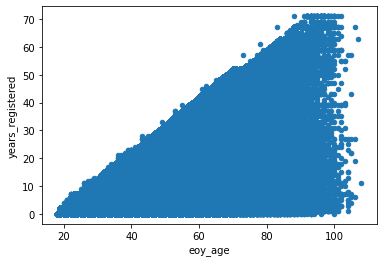

In [34]:
df1.plot.scatter('eoy_age', 'years_registered')

#### Correlation Matrix: Eoy_Age vs Years_Registered

In [35]:
df1[['eoy_age', 'years_registered']].corr()

,eoy_age,years_registered
eoy_age,1.000000,0.586979
years_registered,0.586979,1.000000


### Decision Tree Models

In [36]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Encode categorical variables
model_data = pd.get_dummies(df1)

# Rename target variable
model_data = model_data.rename(columns={'11/03/2020':'voted_2020'})

# Split data into independant variables(X) and dependent variable(y)
X = model_data.drop('voted_2020', axis=1).copy()
y = model_data['voted_2020']

# Column names for Tree Plot
feature_cols = X.columns

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [37]:
# This function runs a Decision Tree and returns evaluation metrics with the Decision Tree
# The parameters have defualt values that can be changed explicitly
def tree_model(depth=3, cw='balanced', c='gini', s='best', msl=2, mf='sqrt'):
    # Create Decision Tree Object
    clf = tree.DecisionTreeClassifier(max_depth=depth, class_weight=cw, criterion=c, splitter=s, min_samples_leaf=msl, max_features=mf, random_state=42)

    # Fit the Decision Tree Object to training data
    clf2 = clf.fit(X_train, y_train)

    # Visualize Tree
    plt.figure(figsize=(15,7))
    tree.plot_tree(clf2,
                  feature_names=feature_cols,
                  class_names=['Did Not Vote', 'Voted'],
                  filled=True, precision=2,
                  node_ids=True, fontsize=12,
                  label='root', proportion=True,
                  impurity=True)

    # Make Predictions for Test data
    y_pred = clf2.predict(X_test)

    #Create a Classification Report with Evaluation Metrics
    print(metrics.classification_report(y_test, y_pred))


### Decision Tree Model #1

              precision    recall  f1-score   support

           0       0.48      0.62      0.54     40252
           1       0.88      0.81      0.84    137908

    accuracy                           0.76    178160
   macro avg       0.68      0.71      0.69    178160
weighted avg       0.79      0.76      0.77    178160



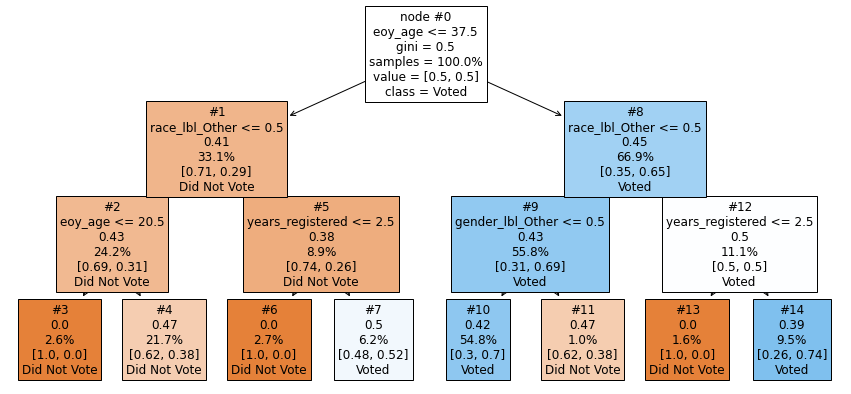

In [38]:
tree_model()

### Model #1 (Baseline) Evaluation: 
### Interpretation:
* This model chose the <b>age(eoy_age)</b> to be the <b>best predictor of voter turnout.</b>
 * Other predictor variables chosen were <i>race_lbl_other, years_registered, and gender_lbl_other.</i>
* <b>Most Likely to Vote</b>: Model #1 predicts that active Wake County voters who are over 37.5 years old, with a race listed as 'Other' , who have been registered longer than 2.5 years were most likely to vote. However, a larger percentage of citizens were predicted to vote if they are over 37.5 years old, either Black or White, with a gender listed as Male or Female. 54.8 percent of citizens vs 9.5%. 
* <b>Least Likely to Vote</b>: Model #1 predicts that active Wake County voters between the ages of 21 and 38 who list their race as black or white were least likely to vote.
 
### Metric Summary (Positive Class/ "Voted"):
* Precision: 88%
* Recall: 81%
* F1 Score: 84%
* Accuracy: 76%  

### Decision Tree #2

              precision    recall  f1-score   support

           0       0.41      0.60      0.49     40252
           1       0.86      0.75      0.80    137908

    accuracy                           0.72    178160
   macro avg       0.64      0.67      0.65    178160
weighted avg       0.76      0.72      0.73    178160



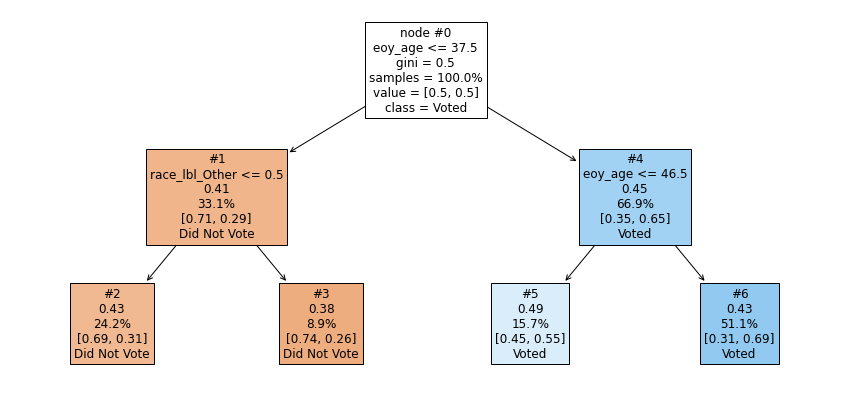

In [39]:
tree_model(depth=2)

### Model #2 Evaluation: 
### Interpretation:
* This model also chose the <b>age(eoy_age)</b> to be the <b>best predictor of voter turnout.</b>
 * The other predictor variable chosen was <i>race_lbl_other.</i>
* <b>Most Likely to Vote</b>: Model #2 predicts that active Wake County voters 47  years of age or older were the most likely to vote. 
* <b>Least Likely to Vote</b>: Model #2 predicts that active Wake County voters under the age of 38 with their race listed as 'Other' were the least likely to vote.

### Metric Summary (Positive Class/ "Voted"):
* Precision: 86%
* Recall: 75%
* F1 Score: 80%
* Accuracy: 72%  

### Decision Tree # 3
* Select Best Features based on Tree Plot from Model #1

In [40]:
# Use the list of columns to select best features
X.columns

Index(['eoy_age', 'congressional_district_lbl', 'years_registered',
       'city_APEX', 'city_CARY', 'city_OTHER', 'city_RALEIGH',
       'city_WAKE FOREST', 'race_lbl_Black', 'race_lbl_Other',
       'race_lbl_White', 'party_lbl_Democrat', 'party_lbl_Other',
       'party_lbl_Republican', 'party_lbl_Unaffiliated', 'gender_lbl_Female',
       'gender_lbl_Male', 'gender_lbl_Other', 'municipality_lbl_CAR',
       'municipality_lbl_OTHER', 'municipality_lbl_RAL',
       'municipality_lbl_UNC'],
      dtype='object')

              precision    recall  f1-score   support

           0       0.65      0.65      0.65     40252
           1       0.90      0.90      0.90    137908

    accuracy                           0.84    178160
   macro avg       0.78      0.77      0.77    178160
weighted avg       0.84      0.84      0.84    178160



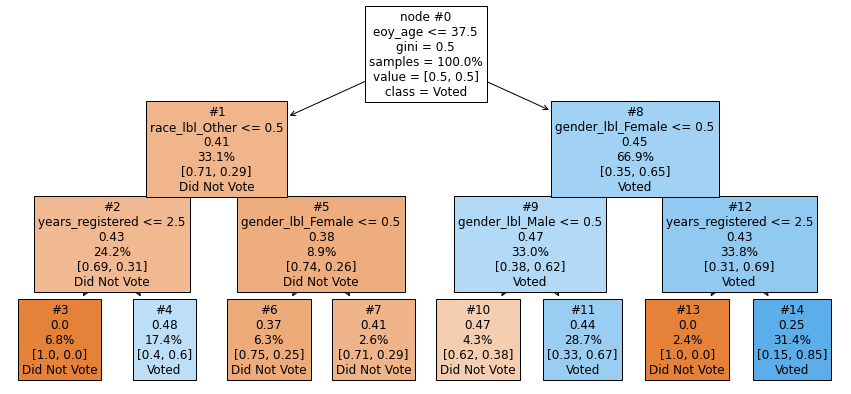

In [41]:
# New dataframe with important features
new_X = X[['eoy_age', 'years_registered', 'race_lbl_Black', 'race_lbl_Other',
           'race_lbl_White', 'gender_lbl_Female','gender_lbl_Male', 'gender_lbl_Other']].copy()

# New list of column names
feature_cols = new_X.columns

# Train test split with new dataframe
X_train, X_test, y_train, y_test = train_test_split(new_X, y, random_state=42)

tree_model()

### Model #3 Evaluation: 
### Interpretation:
* This model also chose the <b>age(eoy_age)</b> to be the <b>best predictor of voter turnout.</b>
 * The other predictor variable chosen were <i>race_lbl_Other, gender_lbl_Female, and gender_lbl_Male.</i> 
* <b>Most Likely to Vote</b>: Model #3 predicts that active Wake County female voter 38 years of age or older who have been registered to vote for over 2.5 years were most likely to vote.
* <b>Least Likely to Vote</b>: Model #3 predicts that active Wake County black and white male voters under 38 years of age were least likely to vote.  

### Metric Summary (Positive Class/ "Voted"):
* Precision: 90%
* Recall: 90%
* F1 Score: 90%
* Accuracy: 84%  

## Champion Model:
* <u>Model #3</u> is the best performing(Champion) model.
* While additional work should be done to insure the model has not been overfit, this model uses features that were selected based of the results from the first Decision Tree.
* These features result in imporved performance metrics, less input needed for the model, and reduced model complexity.